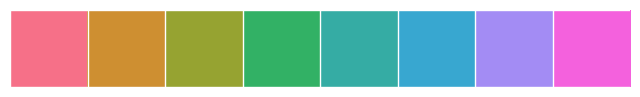

In [4]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.gridspec as gridspec

In [62]:
# data from EPA 1/4 - 1/23 noon
epa_queens=pd.read_excel('/Users/stella/Desktop/data/Queens Data_010417_012317.xls')[3:28084]
epa_queens=epa_queens.rename(index=str, columns={
                                      "SiteReport - Site Queens College Report : TimeBeginning": "Datetime",
                                      "Unnamed: 1": "PM2.5_MC (ug/m3)",
                                      "Unnamed: 2": "PM2.5_FEM_MC (ug/m3)",
                                      "Unnamed: 3": "PM2.5_Ref_Mass (ug/m3)",
                                      "Unnamed: 4": "PM10_MC (ug/m3)",
                                      "Unnamed: 5": "Ultrafine (#/cm3)"}) 
epa_queens['Datetime']=epa_queens['Datetime'].apply(lambda x: parse(x))

In [63]:
aqu=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170206150115.csv')
aqu['DateTime']=aqu['DateTime'].apply(lambda x: parse(x))
aqu=aqu.rename(index=str, columns={ "MEASURE_PA_LABEL":"ldsa",
                                    "MEASURE_MG_LABEL":"num",
                                    "MEASURE_N_LABEL":"pm25",
                                           
                                    "MEASURE_PA_LABEL.1":"ldsa-1",
                                    "MEASURE_MG_LABEL.1":"num-1",
                                    "MEASURE_N_LABEL.1":"pm25-1",
                                           
                                    "MEASURE_PA_LABEL.2":"ldsa-2",
                                    "MEASURE_MG_LABEL.2":"num-2",
                                    "MEASURE_N_LABEL.2":"pm25-2",})

In [75]:
aqi=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=1)
aqi_ldsa=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=0)
aqi_pn=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=2)

In [65]:
print(epa_queens.columns)
print(aqu.columns)
print(aqi.columns)
print(aqi_ldsa.columns)

Index(['Datetime', 'PM2.5_MC (ug/m3)', 'PM2.5_FEM_MC (ug/m3)',
       'PM2.5_Ref_Mass (ug/m3)', 'PM10_MC (ug/m3)', 'Ultrafine (#/cm3)'],
      dtype='object')
Index(['DateTime', 'ldsa', 'num', 'pm25', 'ldsa-1', 'num-1', 'pm25-1',
       'ldsa-2', 'num-2', 'pm25-2'],
      dtype='object')
Index(['time', 'value (µg/m³)'], dtype='object')
Index(['time', 'value (µm²/cm³)'], dtype='object')


In [66]:
epa_queens=epa_queens.set_index('Datetime')
aqu=aqu.set_index('DateTime')
aqi=aqi.set_index('time')
aqi_ldsa=aqi_ldsa.set_index('time')

In [67]:
df=epa_queens.join(aqu)
df2=df.join(aqi)
df2=df2.join(aqi_ldsa)
df2=df2.dropna()
df2=df2.reset_index()
df2=df2.rename(index=str,columns={"index":"datetime"})
df2=df2.rename(index=str,columns={"value (\u00B5g/m\u00B3)":"aqi pm25 (ug/m3)"})
df2.head(1)

,datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2,aqi pm25 (ug/m3),value (µm²/cm³)
0,2017-01-04 15:02:00,0.37,0.26,1.71,3.6,17800,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191,3.003132,7.510291


In [68]:
df3=df2.copy(False)

In [12]:
df3

,datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2,aqi pm25 (ug/m3),value (µm²/cm³)
0,2017-01-04 15:02:00,0.37,0.26,1.71,3.6,17800,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191,3.003132,7.510291
1,2017-01-04 15:03:00,0.16,0.11,1.88,3.45,17400,4.499,3684.353,0.177,4.595,3346.061,0.161,4.712,3913.317,0.188,2.951012,7.349568
2,2017-01-04 15:04:00,0.02,0.01,1.99,3.36,16150,4.666,3820.196,0.183,4.595,3346.061,0.161,4.712,3913.317,0.188,2.924203,7.139911
3,2017-01-04 15:05:00,0.02,0.01,1.99,3.36,15300,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178,3.083743,7.285524
4,2017-01-04 15:06:00,0.02,0.01,1.99,3.36,15550,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178,3.124721,7.314782
5,2017-01-04 15:07:00,0.02,0.01,1.99,3.36,14700,4.666,3820.196,0.183,4.300,3129.314,0.150,4.380,3636.216,0.175,3.127570,7.278803
6,2017-01-04 15:08:00,0.02,0.01,1.99,3.36,12800,4.666,3820.196,0.183,4.300,3129.314,0.150,4.380,3636.216,0.175,3.034455,7.065898
7,2017-01-04 15:09:00,-0.28,-0.29,1.99,3.12,12000,4.451,3645.031,0.175,4.362,3174.448,0.152,4.457,3700.631,0.178,3.108113,7.265886
8,2017-01-04 15:10:00,-0.49,-0.49,1.99,2.96,11150,4.451,3645.031,0.175,4.362,3174.448,0.152,4.457,3700.631,0.178,2.857675,7.053210
9,2017-01-04 15:11:00,-0.49,-0.49,1.99,2.96,11000,4.451,3645.031,0.175,4.298,3126.679,0.150,4.452,3695.304,0.177,2.814080,7.072061


In [14]:
cpc=df3['Ultrafine (#/cm3)']

In [16]:
urb=df3['num']

In [19]:
del df3['PM10_MC (ug/m3)'],df3['PM2.5_FEM_MC (ug/m3)'],df3['PM2.5_Ref_Mass (ug/m3)']
del df3['PM2.5_MC (ug/m3)'],df3['ldsa'],df3['ldsa-1'],df3['ldsa-2']
del df3['pm25'],df3['pm25-2'],df3['pm25-1'],df3['aqi pm25 (ug/m3)'],df3['value (µm²/cm³)']

In [28]:
df3=df3.rename(columns={'Ultrafine (#/cm3)':'cpc'})

In [30]:
df3.head()

,datetime,cpc,num,num-1,num-2
0,2017-01-04 15:02:00,17800,3684.353,3308.769,3982.353
1,2017-01-04 15:03:00,17400,3684.353,3346.061,3913.317
2,2017-01-04 15:04:00,16150,3820.196,3346.061,3913.317
3,2017-01-04 15:05:00,15300,3820.196,3175.265,3697.959
4,2017-01-04 15:06:00,15550,3820.196,3175.265,3697.959


In [32]:
df3['cpc-1']=df3.cpc.shift(-1)
df3['cpc-2']=df3.cpc.shift(-2)
df3['cpc-3']=df3.cpc.shift(-3)
df3['cpc-4']=df3.cpc.shift(-4)
df3['cpc-5']=df3.cpc.shift(-5)
df3['cpc-10']=df3.cpc.shift(-10)

In [34]:
df3.head()

,datetime,cpc,num,num-1,num-2,cpc-1,cpc-2,cpc-3,cpc-4,cpc-5,cpc-10
0,2017-01-04 15:02:00,17800,3684.353,3308.769,3982.353,17400,16150,15300,15550,14700,12600
1,2017-01-04 15:03:00,17400,3684.353,3346.061,3913.317,16150,15300,15550,14700,12800,14500
2,2017-01-04 15:04:00,16150,3820.196,3346.061,3913.317,15300,15550,14700,12800,12000,15050
3,2017-01-04 15:05:00,15300,3820.196,3175.265,3697.959,15550,14700,12800,12000,11150,14150
4,2017-01-04 15:06:00,15550,3820.196,3175.265,3697.959,14700,12800,12000,11150,11000,12600


In [42]:
df3=df3.dropna()
df3=df3.reset_index()
del df3['index']

In [48]:
df3=df3[(df3['num']>0) & (df3['num-1']>0) & (df3['num-2']>0)]

In [52]:
df3=df3[(df3['cpc']!='---') & (df3['cpc-1']!='---') & (df3['cpc-2']!='---') & (df3['cpc-3']!='---') &
        (df3['cpc-4']!='---') & (df3['cpc-5']!='---') & (df3['cpc-10']!='---')]


In [55]:
x=df3['num']
y=df3['cpc']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.358519517201


In [56]:
x=df3['num']
y=df3['cpc-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.351685820366


In [57]:
x=df3['num']
y=df3['cpc-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.345517722676


In [58]:
x=df3['num']
y=df3['cpc-3']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.339508107423


In [59]:
x=df3['num']
y=df3['cpc-4']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.334111381106


In [60]:
x=df3['num']
y=df3['cpc-5']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.328668775936


In [61]:
x=df3['num']
y=df3['cpc-10']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.310770386945


In [70]:
del df3['PM10_MC (ug/m3)'],df3['PM2.5_FEM_MC (ug/m3)'],df3['PM2.5_Ref_Mass (ug/m3)']
del df3['PM2.5_MC (ug/m3)'],df3['ldsa'],df3['ldsa-1'],df3['ldsa-2']
del df3['pm25'],df3['pm25-2'],df3['pm25-1']

In [77]:
aqi.head()

,time,value (µg/m³)
0,2017-01-03 23:59:00,1.764067
1,2017-01-04 00:00:00,1.756807
2,2017-01-04 00:01:00,1.714769
3,2017-01-04 00:02:00,1.708551
4,2017-01-04 00:03:00,1.751536


In [78]:
aqi_ldsa.head()

,time,value (µm²/cm³)
0,2017-01-03 23:59:00,3.979730
1,2017-01-04 00:00:00,3.956461
2,2017-01-04 00:01:00,4.011436
3,2017-01-04 00:02:00,3.901940
4,2017-01-04 00:03:00,3.915907


In [79]:
aqi_pn.head()

,time,value (1/cm³)
0,2017-01-03 23:59:00,336.300
1,2017-01-04 00:00:00,334.056
2,2017-01-04 00:01:00,345.666
3,2017-01-04 00:02:00,331.908
4,2017-01-04 00:03:00,329.299


In [82]:
aqi=aqi.set_index('time')

In [83]:
aqi_ldsa=aqi_ldsa.set_index('time')
aqi_pn=aqi_pn.set_index('time')

In [87]:
aqi=aqi.join(aqi_ldsa)
aqi=aqi.join(aqi_pn)

In [89]:
aqi=aqi.reset_index()

In [91]:
aqi=aqi[aqi['value (1/cm³)']>0]

In [100]:
aqi=aqi[aqi['time']>datetime.date(2017,1,5)]

In [124]:
np.polyfit(aqi['value (1/cm³)'], aqi['value (µg/m³)'],-2)

ValueError: expected deg >= 0

(0, 30)

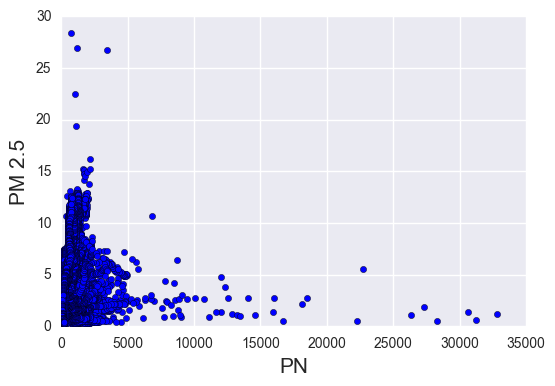

In [119]:
plt.xlabel('PN',fontsize=15)
plt.ylabel('PM 2.5',fontsize=15)
plt.scatter(aqi['value (1/cm³)'],aqi['value (µg/m³)'])
plt.xlim([0,35000])
plt.ylim([0,30])

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 
def fitFunc(t, a, b, c):
    return a*np.exp(-b*t) + c

In [128]:
#def fitFunc(t, a, b, c):
#    return a*np.exp(-b*t) + c

def fitFunc2(x,a,b):
    return a*(1/x) + b

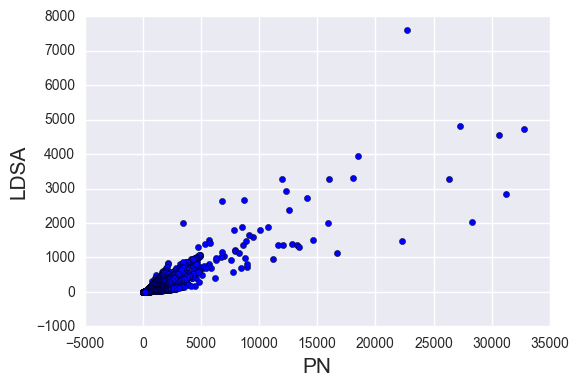

In [138]:
plt.scatter(aqi['value (1/cm³)'],aqi['value (µm²/cm³)']**2)
plt.xlabel('PN',fontsize=15)
plt.ylabel('LDSA',fontsize=15)
#plt.xlim([0,35000])
#plt.ylim([0,100])

(0, 100)

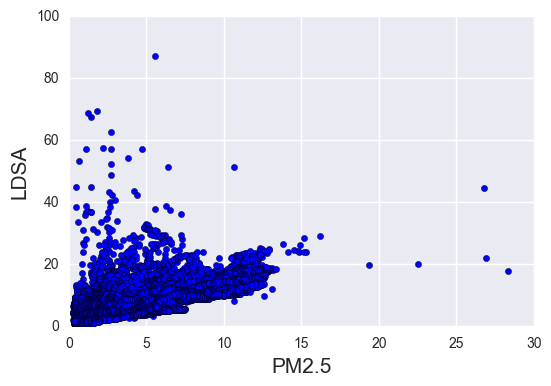

In [117]:
plt.scatter(aqi['value (µg/m³)'],aqi['value (µm²/cm³)'])
plt.xlabel('PM2.5',fontsize=15)
plt.ylabel('LDSA',fontsize=15)
plt.xlim([0,30])
plt.ylim([0,100])

In [139]:
aqu.head()

,ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2
DateTime,,,,,,,,,
2017-01-04 15:02:00,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191
2017-01-04 15:03:00,4.499,3684.353,0.177,4.595,3346.061,0.161,4.712,3913.317,0.188
2017-01-04 15:04:00,4.666,3820.196,0.183,4.595,3346.061,0.161,4.712,3913.317,0.188
2017-01-04 15:05:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178
2017-01-04 15:06:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178


In [142]:
# Scientific libraries
import numpy as np

points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])

# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
print (f)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)


#data = [trace1, trace2]
#fig = go.Figure(data=data, layout=layout)

#py.plot(fig, filename='Polynomial-Fit-in-python')

        3         2
0.4345 x - 5.607 x + 16.78 x - 10.61


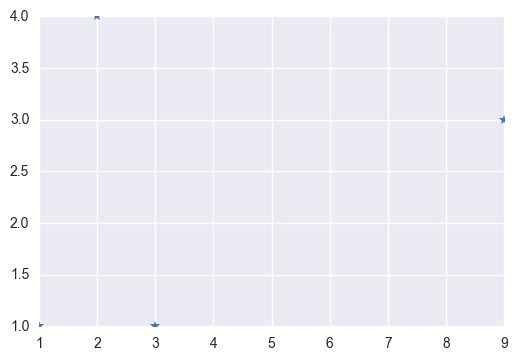

In [144]:
plt.plot(x,y,'*')